# 第7回レポート課題


提出物：

- report07.ipynb（このノートブック）
  - ノートブックに直接コードを書いて実行できる
  - コードを実行した結果の状態で保存して提出すること
- レポート
  - 形式：A4縦，PDFファイル1つ（複数ファイルやwordファイルは受け付けない）
  - 1ページ目冒頭に，氏名・学生番号・所属学科/分野/コース・授業名・課題名・出題授業日を明記すること
  - 各課題（「課題7-01」「課題7-02」など）を区別できるようにすること
  - 含める内容
    - コードの抜粋とその説明
    - 実行結果（テキスト出力，プロット等）とその説明
    - 各課題で指定された内容とその説明
  - レポート作成上の注意事項:
    - **レポートにはできるだけ丁寧な説明を含めること**



# ニュートン法


## 課題7-01：2分法


2分法により多項式の方程式
$$
\begin{align}
 f(x) = w_0 + w_1 x + w_2 x^2 + \ldots w_{d-1} x^{d-1} + w_{d} x^d = 0
\end{align}
$$
を解くプログラムを作成せよ．ただし多項式の次数$d$は任意であり，与えられた重みベクトル$\boldsymbol{w} = (w_0, w_1, \ldots, w_d)$によって決定する．

現在の範囲$[a,b]$に対して，$|f( \frac{a+b}{2})|$が1e-8以下になるか，適当な繰り返し回数の上限に達したら終了すること．

以下のコードにはテンプレートとして
$$
f(x) = -20 - 2 x^2 - 2 x^3 + 0.5 x^4 + 0.1 x^5
$$
という関数が設定されている．これは以下でプロットされるような関数であり，異なる解を3つ持つ．

図を見て初期値や解の挙動の確認すること．


- レポートに含めること:
  - テンプレートで設定された関数の異なる3つの解を得るための$a, b$の初期値と，それらを用いて得られた$x$と$f(x)$，および$a, b$の収束の様子のプロット
  - 上記以外の多項式（$w$と$d$，初期解は自分で決めてよい．ただし，どのような値を使った示すこと．また関数形状をグラフで示すこと）に対して，実行して得られた$x$と$f(x)$，および$a, b$の収束の様子のプロット



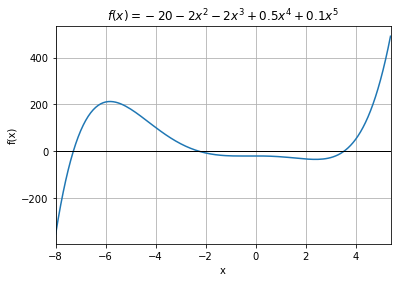

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams["savefig.bbox"] = 'tight'

x = np.arange(-8, 5.5, 0.1)

def f(x):
    return -20 - 2 * x**2 - 2 * x**3 + 0.5 * x**4 + 0.1 * x**5

plt.plot(x, f(x))
plt.axhline(y=0, c='k', lw=1)

plt.xlim(x.min(), x.max())
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('$f(x) = -20 - 2 x^2 - 2 x^3 + 0.5 x^4 + 0.1 x^5$')
plt.grid()

plt.show()

In [2]:
import numpy as np



def poly(w, x):
    """多項式f(x) = w_0 + w_1 x^1 + w_2 x^2 ... w_d x^d を計算する関数

    Args:
        w (ndarray): d+1次元ベクトル
        x (float): スカラーx

    Returns:
        fx (float): 関数値f(x)
    """

    # --------------------------------------------------
    # 多項式f(x) = w_0 + w_1 x^1 + w_2 x^2 ... w_d x^d を計算するコードを作成
    # ヒント: len(w)でベクトルwのサイズが取得可能
    # --------------------------------------------------
    fx = 0  # これはダミーです


    return fx


def solvPolyBinarySearch(w, a, b):
    """二分法

    Args:
        w (ndarray): 多項式の重み
        a (float): 二分法の範囲の初期値
        b (float): 二分法の範囲の初期値

    Returns:
        a (float): 二分法の範囲
        b (float): 二分法の範囲
        is_success (bool): 二分法が成功したかどうか
        
    """

    max_iter = 100
    tol = 1e-8  # tolerance 許容誤差

    print("Binary search for polynomial function")

    ab_list = [(a, b)]

    for iter in range(max_iter):

        #
        # f(a)とf(b)を計算する
        #
        fa = poly(w, a)
        fb = poly(w, b)

        print("Iteration {}: a={}, b={}, f(a)={}, f(b)={}, |a-b|={}".format(
            iter, a, b, fa, fb, abs(a - b)
        ))

        #
        # f(a)とf(b)の符号が同じ場合は異常終了
        #
        if fa * fb > 0:
            print("error: f(a) * f(b) > 0")
            return a, b, False, ab_list


        # --------------------------------------------------
        # aとbの中点cでの関数値を調べて[a,b]を更新するコードを作成
        # --------------------------------------------------




        # --------------------------------------------------
        # 中点における f の値が許容値tolより小さくなれば終了
        # --------------------------------------------------




    print("Binary search iteration reached the maximum.")

    return a, b, False, ab_list






d = 5  # 多項式の次数

#
# 多項式を f(x) = w[0] + w[1] x^1 + w[2] x^2 + ... w[d] x^d とする
#
w = np.zeros(d + 1)  # 次数+1個の係数を0で初期化

#
# 係数の設定. この場合は
# f(x) = -20 - 2x^2 - 2x^3 + 0.5x^4 + 0.1x^5
#
w[0] = -20
w[1] = 0
w[2] = -2
w[3] = -2
w[4] = 0.5
w[5] = 0.1

#
# 初期値
#
a = -1
b = 5


a, b, is_success, ab_list = solvPolyBinarySearch(w, a, b)

if is_success:
    print("Approximate solution of f(x) = 0 is x = ", (a + b) / 2)
else:
    print("Binary search failed.")



Binary search for polynomial function
-------------------------
Iteration =  0
a =  -1 , b =  5
f(a) =  -19.6 , f(b) =  305.0
|a - b| =  6
-------------------------
Iteration =  1
a =  2.0 , b =  5
f(a) =  -32.8 , f(b) =  305.0
|a - b| =  3.0
-------------------------
Iteration =  2
a =  3.5 , b =  5
f(a) =  -2.6968749999999986 , f(b) =  305.0
|a - b| =  1.5
-------------------------
Iteration =  3
a =  3.5 , b =  4.25
f(a) =  -2.6968749999999986 , f(b) =  92.12861328125001
|a - b| =  0.75
-------------------------
Iteration =  4
a =  3.5 , b =  3.875
f(a) =  -2.6968749999999986 , f(b) =  33.70138854980469
|a - b| =  0.375
-------------------------
Iteration =  5
a =  3.5 , b =  3.6875
f(a) =  -2.6968749999999986 , f(b) =  13.150594615936285
|a - b| =  0.1875
-------------------------
Iteration =  6
a =  3.5 , b =  3.59375
f(a) =  -2.6968749999999986 , f(b) =  4.685310944914818
|a - b| =  0.09375
-------------------------
Iteration =  7
a =  3.5 , b =  3.546875
f(a) =  -2.6968749999999

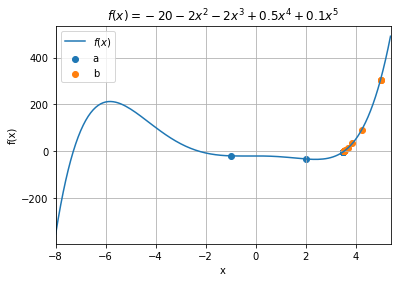

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


x = np.arange(-8, 5.5, 0.1)

def f(x):
    return -20 - 2 * x**2 - 2 * x**3 + 0.5 * x**4 + 0.1 * x**5

plt.plot(x, f(x), label='$f(x)$')
plt.axhline(y=0, c='k', lw=1)

ab = np.array(ab_list)
a = ab[:, 0]
b = ab[:, 1]
fab = np.array([ (f(a), f(b)) for a, b, in ab_list])
fa = fab[:, 0]
fb = fab[:, 1]
plt.scatter(a, fa, label='a')
plt.scatter(b, fb, label='b')

plt.xlim(x.min(), x.max())
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('$f(x) = -20 - 2 x^2 - 2 x^3 + 0.5 x^4 + 0.1 x^5$')
plt.grid()
plt.legend()

plt.savefig('fig_report07-01.png')
plt.savefig('fig_report07-01.jpg')
plt.savefig('fig_report07-01.pdf')
plt.savefig('fig_report07-01.svg')

plt.show()







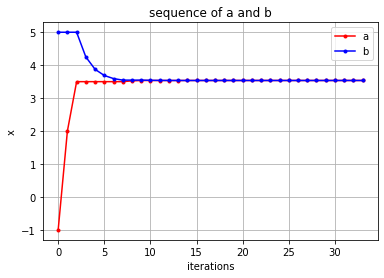

In [23]:

ab = np.array(ab_list)
a = ab[:, 0]
b = ab[:, 1]
plt.plot(range(len(a)), a, '.-', c='red', label='a')
plt.plot(range(len(b)), b, '.-', c='blue', label='b')


# plt.xlim(x.min(), x.max())
plt.xlabel('iterations')
plt.ylabel('x')
plt.title('sequence of a and b')
plt.grid()
plt.legend()

plt.savefig('fig_report07-01-x.png')
plt.savefig('fig_report07-01-x.jpg')
plt.savefig('fig_report07-01-x.pdf')
plt.savefig('fig_report07-01-x.svg')

plt.show()


## 課題7-02：ニュートン法（1変量）


ニュートン法により多項式の方程式
$$
\begin{align}
 f(x) = w_0 + w_1 x + w_2 x^2 + \ldots w_{d-1} x^{d-1} + w_{d} x^d = 0
\end{align}
$$
を解くプログラムを作成せよ．

$|f(x)|$が1e-8以下になるか適当な繰り返し回数の上限に達したら終了すること．



- レポートに含めること:
  - テンプレートで設定された関数の異なる3つの解を得るための$x$の初期値と，それらを用いて得られた$x$と$f(x)$，および$x$の収束の様子のプロット
  - 上記以外の多項式（$w$と$d$，初期解は自分で決めてよい．ただし，どのような値を使った示すこと．また関数形状をグラフで示すこと）に対して，実行して得られた$x$と$f(x)$，および$x$の収束の様子のプロット


In [24]:
import numpy as np


def poly(w, x):
    # 返り値に多項式f(x)の関数値，g(x)=df(x)/dxの値を返す

    # --------------------------------------------------
    # fxに関数値f(x)，gxに微分値g(x)を設定するコードを作成
    # --------------------------------------------------

    fx = 0  # これはダミーです
    gx = 0  # これはダミーです


    return fx, gx



def solvPolyNewton(w, x):
    """ニュートン法

    Args:
        x (float): xの初期値

    Returns:
        x (float): 解x
        is_success (bool): 収束したかどうかのフラグ
    """

    max_iter = 100
    tol = 1e-8

    x_list = [x]

    for iter in range(max_iter):

        # --------------------------------------------------
        # 関数polyの内部を作成
        # --------------------------------------------------
        fx, gx = poly(w, x)

        print("Iteration {}: f(x)={}, x={}, g(x)={}".format(
            iter, fx, x, gx
        ))

        # --------------------------------------------------
        # ニュートン法の更新式を作成
        # --------------------------------------------------


        # --------------------------------------------------
        # |f(x)| < tol が成立したらtrueを返して関数を終了
        # --------------------------------------------------




    print("Newton iteration reached the maximum iterations.")

    return x, False, x_list




d = 5  # 多項式の次数

#
# 多項式を f(x) = w[0] + w[1] x^1 + w[2] x^2 + ... w[d] x^d とする
#
w = np.zeros(d + 1)  # 次数+1個の係数を0で初期化

#
# 係数の設定. この場合は
# f(x) = -20 - 2x^2 - 2x^3 + 0.5x^4 + 0.1x^5
#

w[0] = -20
w[1] = 0
w[2] = -2
w[3] = -2
w[4] = 0.5
w[5] = 0.1


# 初期解
x = -5

x, is_success, x_list = solvPolyNewton(w, x)

if not is_success:
    print("Newton iteration reached the maximum iterations.")
    
print("Approximate solution of f(x) = 0 is x = ", x)



-------------------------
Iteration =  0
x =  -5
f(x) =  180.0
g(x) =  -67.5
-------------------------
Iteration =  1
x =  -2.3333333333333335
f(x) =  2.4230452674897123
g(x) =  -33.91975308641976
-------------------------
Iteration =  2
x =  -2.2618986957840463
f(x) =  0.07929384983351895
g(x) =  -31.706428936879263
-------------------------
Iteration =  3
x =  -2.2593978197001654
f(x) =  9.596804622269417e-05
g(x) =  -31.629690218289056
-------------------------
Iteration =  4
x =  -2.25939478558742
f(x) =  1.411839534171122e-10
g(x) =  -31.629597149522468
Approximate solution of f(x) = 0 is x =  -2.2593947855829564


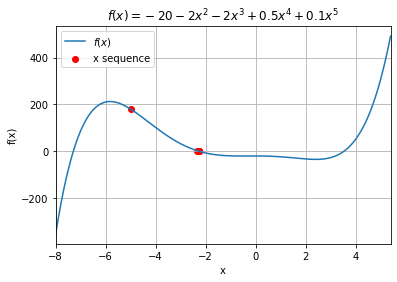

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


x = np.arange(-8, 5.5, 0.1)

def f(x):
    return -20 - 2 * x**2 - 2 * x**3 + 0.5 * x**4 + 0.1 * x**5

plt.plot(x, f(x), label='$f(x)$')
# plt.axhline(y=0, c='k', lw=2)

x_list = np.array(x_list)
fx, _ = poly(w, x_list)
plt.scatter(x_list, fx, c='r', label='x sequence')

plt.xlim(x.min(), x.max())
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('$f(x) = -20 - 2 x^2 - 2 x^3 + 0.5 x^4 + 0.1 x^5$')
plt.grid()
plt.legend()

plt.savefig('fig_report07-02.png')
plt.savefig('fig_report07-02.jpg')
plt.savefig('fig_report07-02.pdf')
plt.savefig('fig_report07-02.svg')

plt.show()

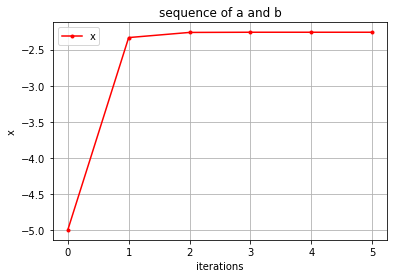

In [26]:

plt.plot(range(len(x_list)), x_list, '.-', c='red', label='x')

# plt.xlim(x.min(), x.max())
plt.xlabel('iterations')
plt.ylabel('x')
plt.title('sequence of x')
plt.grid()
plt.legend()

plt.savefig('fig_report07-02-x.png')
plt.savefig('fig_report07-02-x.jpg')
plt.savefig('fig_report07-02-x.pdf')
plt.savefig('fig_report07-02-x.svg')

plt.show()


# 課題7-03：ニュートン法（多変量）


多変量のニュートン法を実装して以下の非線形連立方程式を解け．
$$
\begin{align*}
	f_1(\boldsymbol{x}) &= \exp \left(- \exp \left( - x_1 - x_2 \right) \right) - x_2 \left( 1 + x_1^2 \right) &= 0 \\
	f_2(\boldsymbol{x}) &= x_1 \cos x_2 + x_2 \sin x_1 - \frac{1}{2} &= 0
\end{align*}
$$
ヤコビ行列に必要な微分は以下のようになっている:
$$
\begin{align*}
 \frac{\partial f_1(\boldsymbol{x})}{\partial x_1} &= \exp(-\exp(-x_1-x_2))  \exp(-x_1-x_2) - 2 x_1 x_2 \\
 \frac{\partial f_1(\boldsymbol{x})}{\partial x_2} &= \exp(-\exp(-x_1-x_2))  \exp(-x_1-x_2) - (1+x_1^2)\\
 \frac{\partial f_2(\boldsymbol{x})}{\partial x_1} &= \cos(x_2) + x_2 \cos(x_1) \\
 \frac{\partial f_2(\boldsymbol{x})}{\partial x_2} &= -x_1 \sin(x_2) + \sin(x_1)
\end{align*}
$$

$\boldsymbol{f}(\boldsymbol{x}) = (f_1(\boldsymbol{x}), f_2(\boldsymbol{x}))^\top$のノルム$\| \boldsymbol{f}(\boldsymbol{x}) \| = \sqrt{f_1(\boldsymbol{x})^2 + f_2(\boldsymbol{x})^2}$が1e-8以下になるか適当な繰り返し回数の上限に達したら終了すること．


- レポートに含めること:
  - 3つ以上の異なる$x$の初期値と，それらを用いて得られた$x$と$f(x)$
  - それぞれについて，ステップサイズ$\alpha$を変えた場合の$x$の収束の様子のプロット


In [18]:
import numpy as np
from numpy import exp, cos, sin



    

def funcs(x):
    """最小化する関数

    Args:
        x (ndarray): 関数f(x)の入力である2次元ベクトルx

    Returns:
        f: 関数f(x)の値を並べたベクトル 
        J: xにおけるヤコビ行列
    """
  
    n = len(x)  # n: xの次元かつ，fの出力の数
    fx = np.zeros(n)  # 今回はfの次元はxと同じ
    J = np.zeros((n, n))

    # --------------------------------------------------
    # ここに関数値f(x)の計算とヤコビ行列Jの計算を作成
    # --------------------------------------------------





    return fx, J



def multiVariateNewton(x, alpha=1.0):
    """多変量非線形方程式のためのニュートン法

    Args:
        x (ndarray): xの初期値
        alpha (float): step size

    Returns:
        x (ndarray): 解x
        is_success (bool): 収束したかどうかのフラグ
    """

    max_iter = 100
    tol = 1e-8

    x_list = [x.copy()]

    for iter in range(max_iter):

        # --------------------------------------------------
        # 関数funcsの内部を作成
        # --------------------------------------------------      
        fx, J = funcs(x)

        # --------------------------------------------------
        # ニュートン法の更新式を作成
        # （連立方程式の計算は過去の課題や資料を参照）
        # --------------------------------------------------

        # Delta_x = ...
        # x = ...



        print("Iteration {}: f(x)={}, x={}, ||f(x)||={}".format(
            iter, fx, x, np.linalg.norm(fx)
        ))

        # --------------------------------------------------
        # fのノルムを求め，tol以下ならtrueを返して関数を終了
        # --------------------------------------------------



    print("Newton iteration reached the maximum iterations.")

    return x, False, x_list




# 
# 初期値
#
x = np.array([0.8, 0.9])
alpha = 1.0

x, is_success, x_list = multiVariateNewton(x, alpha)


if not is_success:
    print("Newton iteration reached the maximum iterations.")
    
print("Approximate solution of [f_1(x) f_2(x)] = [0 0] is ", x)



-------------------------
Iteration =  0
x =  [0.54203396 0.9072115 ]
f(x) =  [-0.64296825  0.64290846]
|f(x)| =  0.909252140901842
-------------------------
Iteration =  1
x =  [0.44002716 0.80785458]
f(x) =  [-0.38298036  0.30187483]
|f(x)| =  0.4876498410458312
-------------------------
Iteration =  2
x =  [0.39445996 0.72162691]
f(x) =  [-0.21384711  0.1481981 ]
|f(x)| =  0.26017929110031685
-------------------------
Iteration =  3
x =  [0.37324203 0.66774684]
f(x) =  [-0.11323037  0.07346191]
|f(x)| =  0.13497321674458873
-------------------------
Iteration =  4
x =  [0.36308037 0.63791344]
f(x) =  [-0.0582672   0.03656132]
|f(x)| =  0.06878805672659577
-------------------------
Iteration =  5
x =  [0.3581209  0.62225033]
f(x) =  [-0.02955427  0.01823546]
|f(x)| =  0.03472731917225377
-------------------------
Iteration =  6
x =  [0.3556729  0.61422956]
f(x) =  [-0.01488308  0.00910596]
|f(x)| =  0.017447768127386697
-------------------------
Iteration =  7
x =  [0.35445701 0.6101

In [3]:
#
# 作図用．編集の必要なし
#

import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams["savefig.bbox"] = 'tight'


def visualize_f(f, fig=None, ax=None, title=None):

    if fig is None or ax is None:
        fig, ax = plt.subplots(figsize=(6, 6))

    # set plot range
    x_min = 0
    x_max = 1
    y_min = 0
    y_max = 1
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    if title is not None:
        plt.title(title)

    # make a grid
    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j] 
    # evaluate f() at each point in the grid
    Z = np.array([f(x) for x in np.c_[XX.ravel(), YY.ravel()]])
    Z = Z.reshape(XX.shape) # reshape form 1D to 2D
    
    cs = plt.contour(XX, YY, Z, 
                    cmap='jet',
                    levels=list(np.arange(-1, 1, 0.2)),
                    )
    ax.clabel(cs, colors='k')

    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')

    return fig, ax


def f_1(x):
    x_1, x_2 = x
    return exp(-exp(-x_1 - x_2)) - x_2 * (1 + x_1**2)

def f_2(x):
    x_1, x_2 = x
    return x_1 * cos(x_2) + x_2 * sin(x_1) - 0.5

In [ ]:
visualize_f(f_1, title=r'$f_1(x)$');
visualize_f(f_2, title=r'$f_2(x)$');


fig, ax = visualize_f(f_1);
visualize_f(f_2, fig, ax, title=r'$f_1(x)$ and $f_2(x)$ with $\alpha=${}'.format(alpha))


x_list = np.array(x_list)
plt.scatter(x_list[:, 0], x_list[:, 1], c='r')
plt.plot(x_list[:, 0], x_list[:, 1], c='r', lw=0.5)

plt.savefig('fig_report07-03.png')
plt.savefig('fig_report07-03.jpg')
plt.savefig('fig_report07-03.pdf')
plt.savefig('fig_report07-03.svg')

plt.show()